# What's New in Marvin 2.1

## Marvin is Python 3.5+ compliant!

In [1]:
import matplotlib
%matplotlib inline

# only necessary if you have a local DB
from marvin import config
config.forceDbOff()

INFO: No release version set. Setting default to MPL-5
         name='/Users/Brian/Work/github_projects/Marvin/python/marvin/db/dbconfi
         g.ini' mode='r' encoding='UTF-8'>
         b/python3.5/site-packages/astropy/extern/bundled/six.py' mode='r'
         encoding='utf-8'>


# Web
## Interactive NASA-Sloan Atlas (NSA) Parameter Visualization
http://www.sdss.org/dr13/manga/manga-target-selection/nsa/
- Drag-and-drop parameter names from table onto axis name to change quantity on axis
- Click Box-and-whisker button and scroll horizontally to see distributions of selected parameters.
- Click on arrow in upper right corner of table to show all parameters.
Python snippets (Cube, Spectrum, Map, Query)

# Tools
## NASA-Sloan Atlas (NSA) Parameters
`Cube.nsa` or `Maps.nsa`

In [26]:
from marvin.tools.cube import Cube
cube = Cube(plateifu='7957-12702')
print(cube)

<Marvin Cube (plateifu='7957-12702', mode='remote', data_origin='api')>


In [3]:
list(cube.nsa.keys())

['elpetro_theta_r',
 'deccat',
 'elpetro_mag_i_z',
 'elpetro_mag_g_i',
 'elpetro_ok',
 'size',
 'elpetro_apcorr_self',
 'nprof',
 'elpetro_kcoeff',
 'elpetro_kcorrect',
 'elpetro_apcorr',
 'dec',
 'ypos',
 'mjd',
 'elpetro_mag_r',
 'rerun',
 'sersic_kcorrect',
 'itwodf',
 'plug_ra',
 'proftheta',
 'bastokes',
 'xpos',
 'sersic_flux',
 'elpetro_mag_i',
 'petro_flux_ivar',
 'isixdf',
 'mag',
 'elpetro_nmgy_ivar',
 'elpetro_mag_g_r',
 'petro_flux',
 'elpetro_flux',
 'sersic_flux_ivar',
 'camcol',
 'elpetro_th90_r',
 'isdss',
 'qstokes',
 'elpetro_mag_u_i',
 'field',
 'profmean_ivar',
 'elpetro_b1000',
 'sersic_absmag',
 'elpetro_mtol',
 'elpetro_flux_ivar',
 'iauname',
 'elpetro_mag_u_g',
 'platequality',
 'racat',
 'sersic_th50',
 'elpetro_ba',
 'profmean',
 'sersic_logmass',
 'elpetro_th50',
 'dflags',
 'petro_phi50',
 'elpetro_flux_ivar_r',
 'elpetro_mag_u_r',
 'plate',
 'phistokes',
 'nsaid',
 'elpetro_amivar',
 'elpetro_theta',
 'ustokes',
 'elpetro_mag_r_i',
 'subdir',
 'sersic_b100

In [4]:
# get the mass of the galaxy
cube.nsa.elpetro_logmass

9.846245541816753

## Map Plotting
### Completely redesigned map plotting
- uses DAP bitmasks (NOVALUE, BADVALUE, MATHERROR, BADFIT, and DONOTUSE) and masks spaxels with `ivar = 0`
- uses hatching for regions with data (i.e., a spectrum) but no measurement by the DAP
- clips at 5th and 95th percentiles (10th and 90th percentiles for velocity and sigma plots)
- velocity plots are symmetric about 0
- minimum SNR is 1

In [27]:
from marvin.tools.maps import Maps
maps = Maps(plateifu='7957-12702')
print(maps)

<Marvin Maps (plateifu='7957-12702', mode='remote', data_origin='api', bintype=SPX, template_kin=GAU-MILESHC)>


In [28]:
haflux = maps['emline_gflux_ha_6564']
print(haflux)

<Marvin Map (plateifu='7957-12702', property='emline_gflux', channel='ha_6564')>


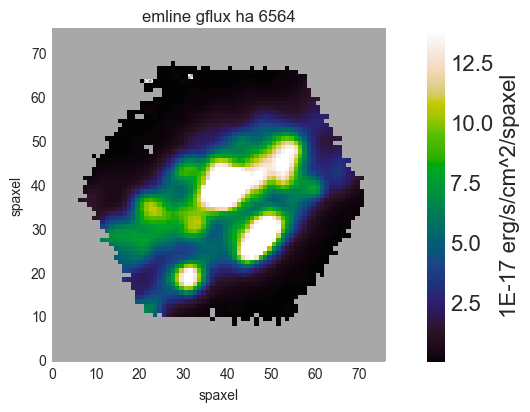

In [7]:
fig, ax = haflux.plot()

In [8]:
stvel = maps['stellar_vel']

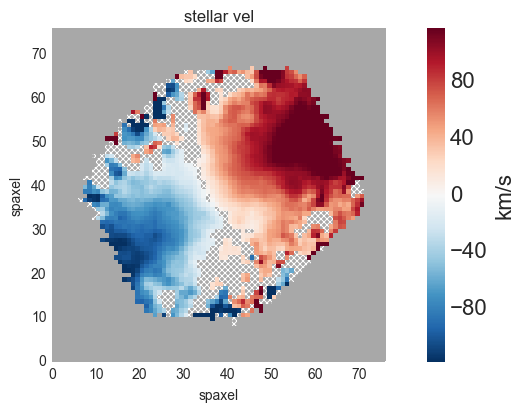

In [9]:
fig, ax = stvel.plot()

In [10]:
stsig = maps['stellar_sigma']

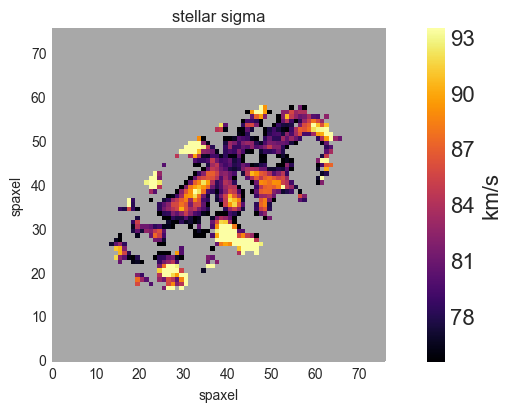

In [11]:
fig, ax = stsig.plot()

## BPT Diagrams
Classify spaxels in a given Maps object according to BPT diagrams!  Will return spaxel classifications for star-forming, composite, seyfert, liner, and ambiguous.  **Note: there is currently a bug in the BPT code that returns incorrect composite spaxels.  This is fixed in a 2.1.2 patch that will be released soon.**

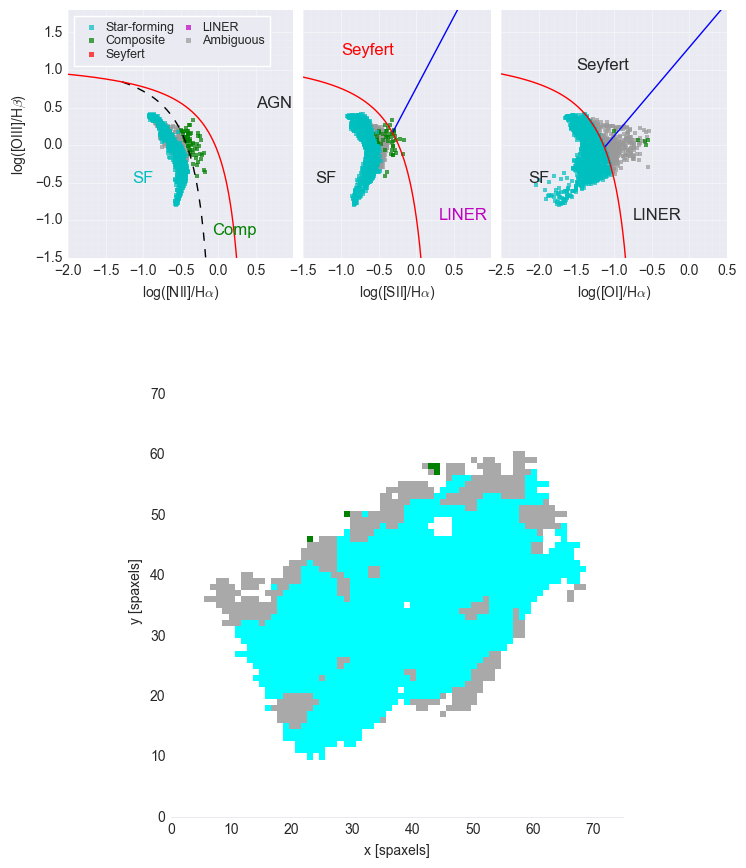

In [12]:
masks, fig = maps.get_bpt()

In [13]:
# this is the global mask for star-forming spaxels.  It can be used to do selections on any other map property. 
masks['sf']['global']

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [15]:
# let's look at the h-alpha flux values for the star-forming spaxels
haflux.value[masks['sf']['global']]

array([ 5.40260124,  2.87350631,  6.6536684 , ...,  2.1389935 ,
        2.25912189,  2.0397644 ])

In [16]:
# let's get the stellar velocity values for the star-forming spaxels
stvel.value[masks['sf']['global']]

array([ -63.6502, -109.179 ,  -85.3621, ...,  125.058 ,  132.153 ,  128.713 ])

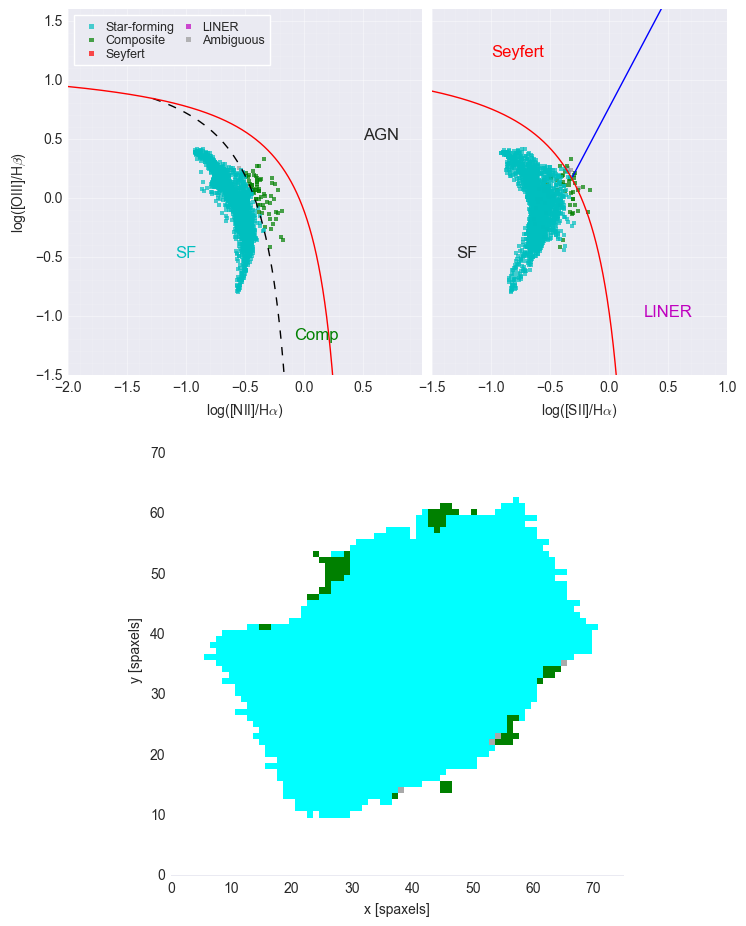

In [17]:
# the BPT uses a strict classification scheme based on the BPTs for NII, SII, and OI.  If you do not want to use OI, 
# you can turn it off
mask, fig = maps.get_bpt(use_oi=False)

the BPT uses a default minimum SNR threshold cutoff of 3 on each emission line.  You can change this globally using the **snr** keyword. **Note: this keyword will change to snrmin in the upcoming 2.12 patch.**


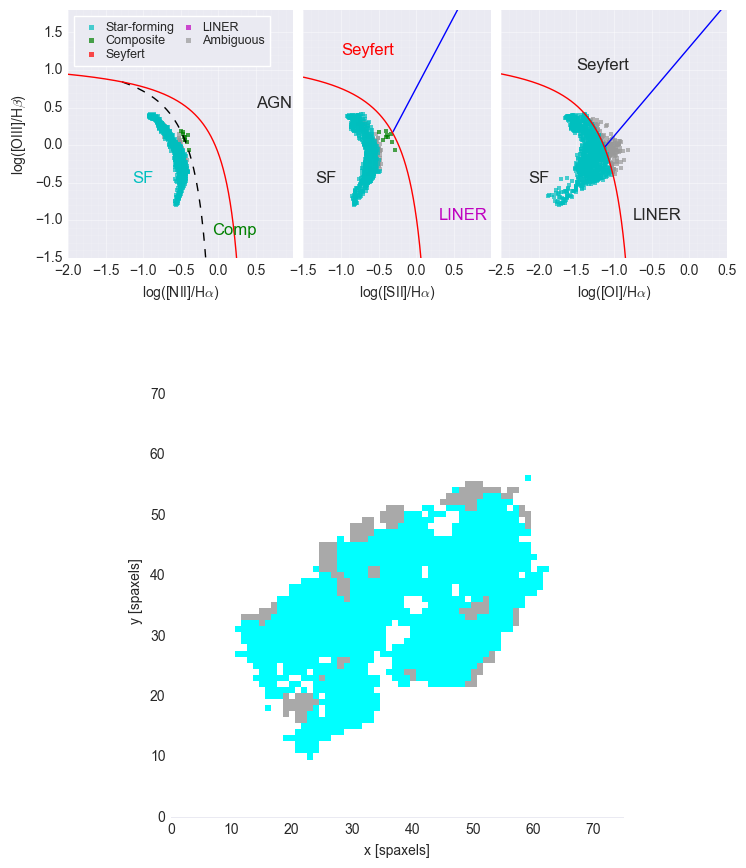

In [19]:
masks, fig = maps.get_bpt(snr=5)

or you change it for individual emission lines.  It will use the default value of 3 for all lines you do not specify.

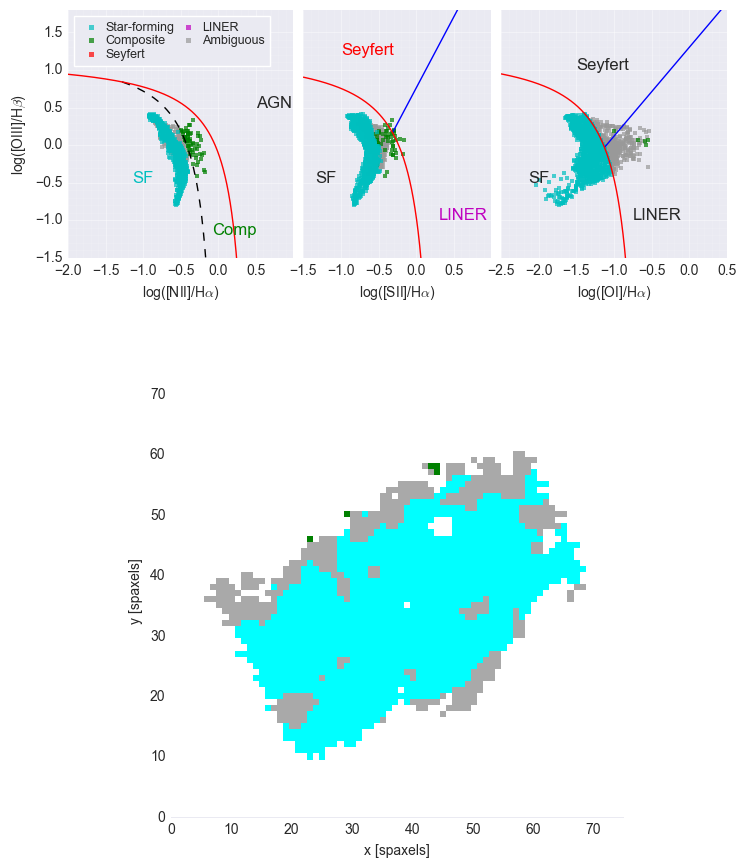

In [20]:
masks, fig = maps.get_bpt(snr={'ha':5, 'sii':1})

### [Visual Guide to Marvin Tools](https://api.sdss.org/doc/manga/marvin/tools/visual-guide.html#visual-guide)

## We Want Your Feedback
- "Provide Feeback" button in Marvin-web that opens a new GitHub Issue.
- If you don't have a GitHub account, it takes under 3 minutes to create one.
- Please describe your problem as well as you can (including copying in error messages), and we can handle labeling and assigning your Issue.